In [9]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz as gp
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score

# Part 1: Running CART on the Titanic dataset

The goal here is to run CART on the full Titanic dataset (we take the training dataset provided by Kaggle and split it three ways into testing, training, validation - the testing set provided by Kaggle does not have the "Survived" category making it impossible for us to measure the quality of our model). This dataset has already been fully pre-processed --- note that this data prepreprocessing has been carried separately on each dataset to avoid train-test contamination.

In [10]:
Titanic_train=pd.read_csv("Titanic_train_cleaned.csv")
Titanic_test=pd.read_csv("Titanic_test_cleaned.csv")
Titanic_validation=pd.read_csv("Titanic_val_cleaned.csv")

In [11]:
ytrain=Titanic_train[["Survived"]]
Xtrain=Titanic_train.drop(columns="Survived")

In [12]:
yvalidation=Titanic_validation[["Survived"]]
Xvalidation=Titanic_validation.drop(columns="Survived")

In [13]:
ytest=Titanic_test[["Survived"]]
Xtest=Titanic_test.drop(columns="Survived")

In [14]:
Xtrain

,Pclass,Age,Fare,Family_Presence,Sex_male,Embarked_Q,Embarked_S
0,3,1.000000,11.1333,1,0,0,1
1,2,41.000000,19.5000,1,0,0,1
2,3,17.000000,8.6625,0,1,0,1
3,2,42.000000,26.0000,1,0,0,1
4,3,30.378347,23.2500,1,0,1,0
...,...,...,...,...,...,...,...
440,2,42.000000,27.0000,1,1,0,1
441,1,38.000000,80.0000,0,0,0,1
442,1,33.000000,53.1000,1,0,0,1
443,2,30.378347,13.8625,0,1,0,0


In [15]:
ytrain

,Survived
0,1
1,1
2,0
3,1
4,1
...,...
440,0
441,1
442,1
443,1


1. For a number of maximum leaves equal to 6, use the following snippet of code to fit a CART to the training dataset

In [16]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(max_leaf_nodes = 6)
classifier_DT.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_leaf_nodes=6)

2. Graph the decision tree using the code below.

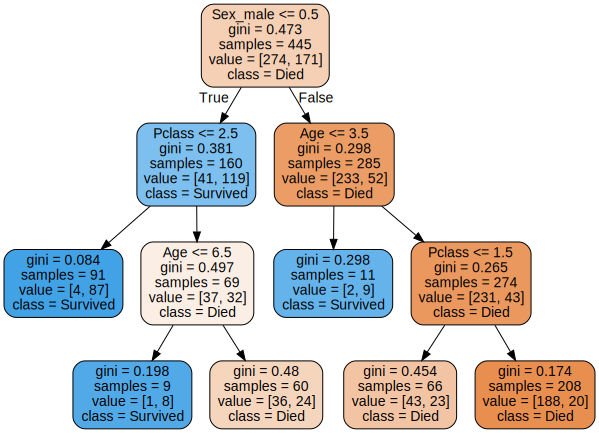

In [17]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(classifier_DT, feature_names = Xtrain.columns, filled = True, rounded = True, class_names=["Died","Survived"])
graph = gp.Source(dot_data)
graph

3. How accurate is this decision tree on the validation data? Generate the predicted values using the code below and then compute the acccuracy of the model.

In [18]:
y_pred = classifier_DT.predict(Xvalidation)

from sklearn.metrics import accuracy_score
score=accuracy_score(yvalidation,y_pred)
score

0.7354260089686099

4. We are now going to use the validation set to optimize how many leaves we should have in our tree. The goal here is to use a for loop to iterate over possible values of the maximum number of leaves, fit the model each time on the *training set* and obtain the `accuracy_score` on the *validation set*. Use the snippet of data below to get started. For comparison, also find the `accuracy_score` on the *training set*.

In [19]:
n_max_leaf_nodes = range(2,60) # Lets train the models with 2, 3, 4, ... 60 leafs
train_array = []
validation_array = []

for n in n_max_leaf_nodes:
    
    classifier_DT = DecisionTreeClassifier(max_leaf_nodes = n)
    classifier_DT = classifier_DT.fit(Xtrain, ytrain)
    
    y_train_pred = classifier_DT.predict(Xtrain)
    y_validation_pred = classifier_DT.predict(Xvalidation)
    
    train_score = accuracy_score(ytrain,y_train_pred)
    validation_score = accuracy_score(yvalidation,y_validation_pred)

    train_array.append([n,train_score])
    validation_array.append([n,validation_score])

5. We can now plot both accuracy levels over the chosen number of nodes. Which number of max_leaf_nodes would you feel comfortable picking?

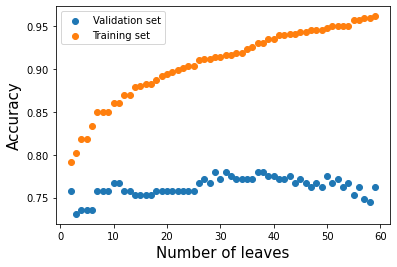

In [20]:
array = pd.DataFrame(validation_array)
plt.scatter(array[0],array[1])

array_train = pd.DataFrame(train_array)
plt.scatter(array_train[0],array_train[1])
plt.legend(['Validation set','Training set'])
plt.xlabel("Number of leaves",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.show()

The graph suggests number of leaves around 10. We now fit the model on a dataset consisting of both training and validation data. Finally, we test the model on our testing set.

6. Retrain your model using this max_leaf_nodes on the full training and validation set. Plot the corresponding tree.

In [21]:
Xtrainval=Xtrain.append(Xvalidation)
ytrainval=ytrain.append(yvalidation)

In [22]:
classifier_DT = DecisionTreeClassifier(max_leaf_nodes = 10)
classifier_DT.fit(Xtrainval, ytrainval)

DecisionTreeClassifier(max_leaf_nodes=10)

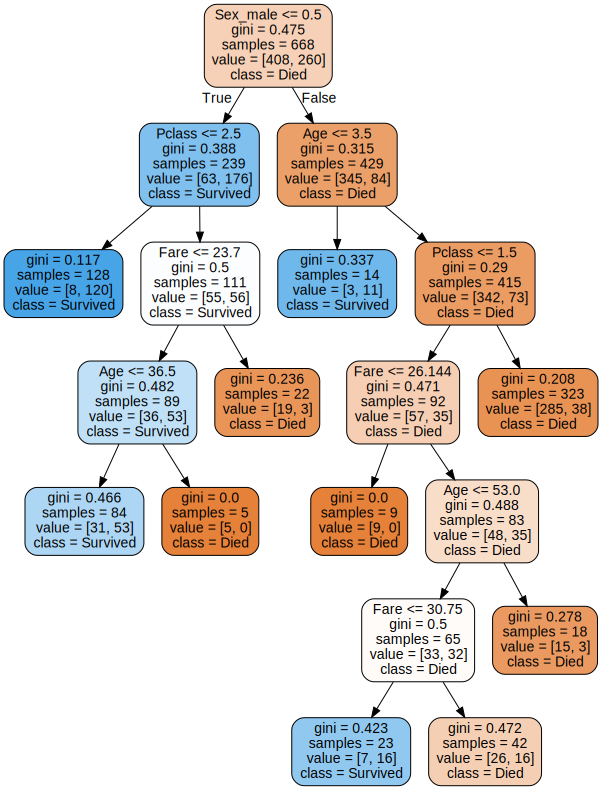

In [23]:
dot_data = export_graphviz(classifier_DT, feature_names = Xtrain.columns, filled = True, rounded = True, class_names=["Died","Survived"])
graph = gp.Source(dot_data)
graph

7. What is the accuracy_score on the testing set?

In [24]:
y_test_pred = classifier_DT.predict(Xtest)
    
accuracy_score(ytest,y_test_pred)

0.820627802690583

8. Pulling up the Titanic Movie dataset, what do you predict for Rose and Jack in terms of survival? If you have seen the movie, does it agree with the outcomes they meet there?

In [25]:
Titanic_movie=pd.read_csv("Titanic_movie.csv")
Titanic_movie

FileNotFoundError: [Errno 2] No such file or directory: 'Titanic_movie.csv'

In [ ]:
classifier_DT.predict(Titanic_movie.drop(columns="Name"))

# Part 2: The Boston houseprices dataset - CART and more advanced tools for regression (optional)

In this question, we use the Boston crime dataset from, e.g., http://lib.stat.cmu.edu/datasets/boston .

In [26]:
boston=sm.datasets.get_rdataset("Boston","MASS")

In [27]:
boston_data=boston.data

## A. Regression Trees

1. As usual, take a look at the header of the dataset and make sure you understand the features before you begin. Are there any duplicates? Any empty values?

In [28]:
boston_data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [29]:
boston_data.isna().any()

crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
black      False
lstat      False
medv       False
dtype: bool

In [30]:
boston_data.duplicated().any()

False

2. We will be attempting to predict the median value of the houses based on the other features using CART. In class, we saw how to use decision trees to *classify*, now our goal is to perform *regression*. To do this create the appropriate feature dataset `X` and the appropriate labels `y`. Then separate these into train/validation/test in proportions of 50/25/25 using `test_train_split`.

In [31]:
y=boston_data[["medv"]]
X=boston_data.drop(columns=["medv"])

In [32]:
Xtrain, Xother, ytrain, yother=train_test_split(X,y,test_size=0.5)

In [33]:
Xvalidation, Xtest, yvalidation, ytest=train_test_split(Xother,yother,test_size=0.5)

In [34]:
Xtrain

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
249,0.19073,22.0,5.86,0,0.431,6.718,17.5,7.8265,7,330,19.1,393.74,6.56
97,0.12083,0.0,2.89,0,0.445,8.069,76.0,3.4952,2,276,18.0,396.90,4.21
304,0.05515,33.0,2.18,0,0.472,7.236,41.1,4.0220,7,222,18.4,393.68,6.93
479,14.33370,0.0,18.10,0,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11
395,8.71675,0.0,18.10,0,0.693,6.471,98.8,1.7257,24,666,20.2,391.98,17.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
191,0.06911,45.0,3.44,0,0.437,6.739,30.8,6.4798,5,398,15.2,389.71,4.69
402,9.59571,0.0,18.10,0,0.693,6.404,100.0,1.6390,24,666,20.2,376.11,20.31
328,0.06617,0.0,3.24,0,0.460,5.868,25.8,5.2146,4,430,16.9,382.44,9.97


3. Using `DecisionTreeRegressor` which works very similarly to `DecisionTreeClassifier`, plot a decision tree for this problem based with `max_leaf_nodes=8`. Try and interpret the tree: which variables seem to condition the value of property? What information is given for each node of the tree?

In [35]:
regressor_DT = DecisionTreeRegressor(max_leaf_nodes=8)
regressor_DT.fit(Xtrain, ytrain)

DecisionTreeRegressor(max_leaf_nodes=8)

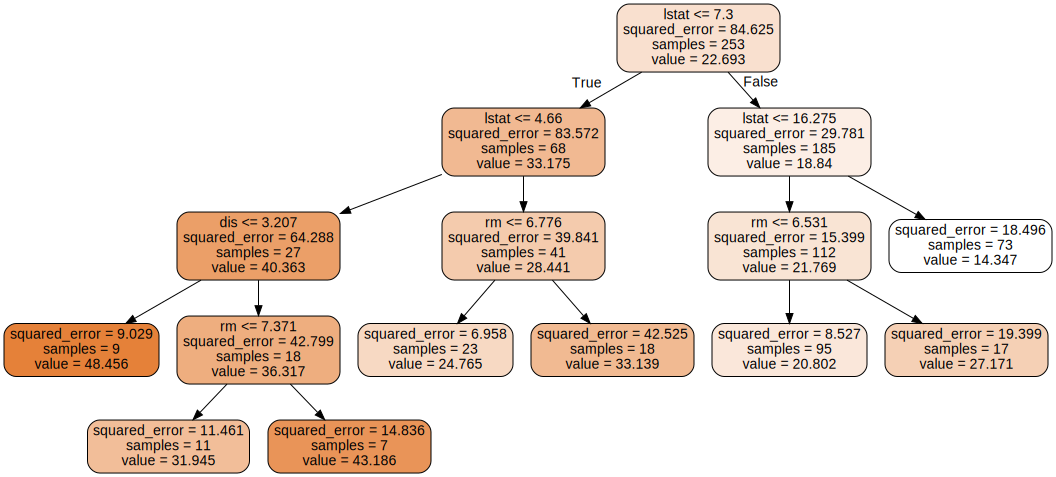

In [36]:
dot_data = export_graphviz(regressor_DT, feature_names = Xtrain.columns, filled = True, rounded = True)
graph = gp.Source(dot_data)
graph

4. Fit the decision tree obtained to `Xvalidation` to obtain `ypredict`. Compute the MSE between `ypredict` and `yvalidation` using `mean_squared_error`. Take a look at its square root. What do you think?

In [37]:
ypredict = regressor_DT.predict(Xvalidation)

score=mean_squared_error(yvalidation,ypredict)
score**(1/2)

5.980151441120015

5. Similarly to what was done in lecture, (1) train this model for many different values of `max_leaf_nodes`, (2) predict the values taken on the validation set, (3) compute the MSE between predicted values and real values, (4) append this value to the `array` variable.

In [38]:
n_max_leaf_nodes = range(2,40) # Lets train the models with 2, 3, 4, ... 40 leaves

array = []

for n in n_max_leaf_nodes:
    
    #insert here the code to train the regressor on the dataset for varying levels of max_leaf_nodes
    regressor_DT = DecisionTreeRegressor(max_leaf_nodes=n)
    regressor_DT.fit(Xtrain, ytrain)   
    
    #insert here the code that gives us the accuracy of the model on the validation set 
    ypredict = regressor_DT.predict(Xvalidation)
    score=mean_squared_error(yvalidation,ypredict)
    
    array.append([n,score])

6. Let's contrast this with the accuracy when evaluated on the training set. Obtain a second set `array_train` with the `accuracy_score` for each `max_leaf_nodes` parameter.

In [39]:
n_max_leaf_nodes = range(2,40) # Lets train the models with 2, 3, 4, ... 40 leafs
array_train= []

for n in n_max_leaf_nodes:
    
    #insert here the code to train the regressor on the dataset for varying levels of max_leaf_nodes
    regressor_DT = DecisionTreeRegressor(max_leaf_nodes=n)
    regressor_DT.fit(Xtrain, ytrain)   
    
    #insert here the code that gives us the accuracy of the model on the training set 
    ypredict = regressor_DT.predict(Xtrain)
    score=mean_squared_error(ytrain,ypredict)
    
    array_train.append([n,score])

7. Plot the predicted scores on the training set and validation set as a function of the number of leaves. What do you observe? Does that make sense? How many leaves would you feel comfortable picking?

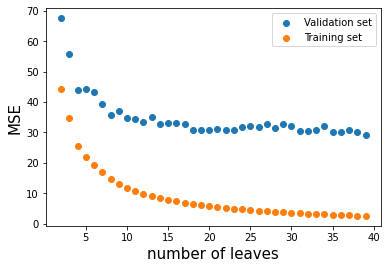

In [40]:
array = pd.DataFrame(array)
plt.scatter(array[0],array[1])

array_train = pd.DataFrame(array_train)
plt.scatter(array_train[0],array_train[1])
plt.legend(['Validation set','Training set'])
plt.xlabel("number of leaves",fontsize=15)
plt.ylabel("MSE",fontsize=15)
plt.show()

I would choose approx 13 leaves (corresponds to a dip in the MSE but not too high).

8. Retrain the model on the training and validation sets with 13 leaves. What is the value of the square root of the MSE on the testing set? Denote this value by `RMSE_DT`.

In [41]:
Xtrainval=Xtrain.append(Xvalidation)
ytrainval=ytrain.append(yvalidation)

In [42]:
regressor_DT = DecisionTreeRegressor(max_leaf_nodes=13)
regressor_DT.fit(Xtrainval, ytrainval)   

DecisionTreeRegressor(max_leaf_nodes=13)

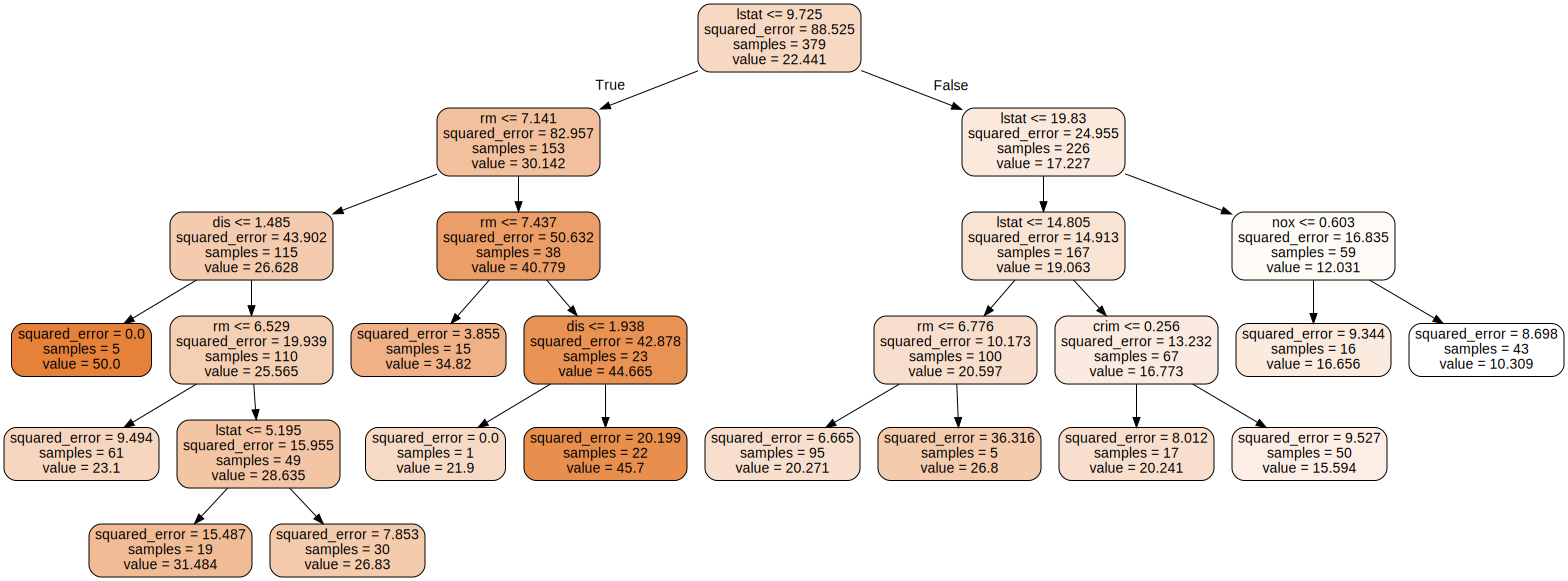

In [43]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(regressor_DT, feature_names = Xtrain.columns, filled = True, rounded = True)
graph = gp.Source(dot_data)
graph

In [44]:
ypredict = regressor_DT.predict(Xtest)
score_RT=mean_squared_error(ytest,ypredict)
score_RT**(1/2)

3.9533623352198988

10. When you look at this tree, what features play a large role in determining house prices?

There are basically 4 (ordered from maybe most important to least): lstat (% lower status population), rm (average number of rooms per dwelling), dis (weighted distance to employment centers), nox (air quality), tax (full-property tax rate). Note that e.g. higher taxes lead to a lower price for example.

## B. Bagging / Random Forests / Gradient Boosting [optional]

In this part, we contrast bagging/random forests/gradient boosting and see which one does the best. It stands to reason that these three methods should at least improve on what we have seen so far. 

We will throughout use the fact that max_leaf_nodes=13 and train our models on `Xtrainval, ytrainval`.

We start first with Bagging/Random Forests and then move onto Gradient Boosting.

1. We use `RandomForestRegressor` for both, tweaking only the parameter `max_features`. Explain why this can be done and what we should set `max_features` to for it to be bagging, and what it should be set equal to for it to be random forests.

The only difference between bagging and random forest is that random forest constrains the number of features the tree can use at each iteration to "split" on. (This is to avoid the same features being used and the trees produced being identical copies of one another). Hence to do bagging, we use `RandomForestRegressor` with `max_features=13`. In the case of Random Forests, we use the rule a rule of thumb according to which we should pick (for regression) the number of features divided by 3. This works out to approximately 5 (=13/3).

2. Let's start with Bagging. Use `RandomForestRegressor` in exactly the same way as `DecisionTreeRegressor` to fit the model on `Xtrainval,ytrainval` with `max_leaf_nodes=13` and `max_features` appropriately set.

Hint: you may want to use `ytrainval["medv"]` instead of `ytrain` to avoid the error message you may be getting.

In [45]:
regressor_Bagging = RandomForestRegressor(max_leaf_nodes=13, max_features=13)
regressor_Bagging.fit(Xtrainval, ytrainval["medv"])

RandomForestRegressor(max_features=13, max_leaf_nodes=13)

3. Use the model you've just obtained to predict the values on `Xtest`. Then, compute the MSE between the predicted values and `ytest`. What is its square root? Denote this by `RMSE_Bagging`. Does it improve on `RMSE_DT`?

In [46]:
ypredict = regressor_Bagging.predict(Xtest)
score_Bagging=mean_squared_error(ytest,ypredict)
score_Bagging**(1/2)

2.7699216475243604

4. Let's move onto random forests. Use `RandomForestRegressor` in exactly the same way as `DecisionTreeRegressor` to fit the model on `Xtrainval,ytrainval` with `max_leaf_nodes=13` and `max_features` appropriately set.

Hint: you may want to use `ytrainval["medv"]` instead of `ytrain` to avoid the error message you may be getting.

In [47]:
regressor_RF = RandomForestRegressor(max_leaf_nodes=13, max_features=6)
regressor_RF.fit(Xtrainval, ytrainval["medv"])

RandomForestRegressor(max_features=6, max_leaf_nodes=13)

5. Use the model you've just obtained to predict the values on `Xtest`. Then, compute the MSE between the predicted values and `ytest`. What is its square root? Denote this by `RMSE_RF`. Does it improve on `RMSE_DT`? on `RMSE_Bagging`?

In [48]:
ypredict = regressor_RF.predict(Xtest)
score_RF=mean_squared_error(ytest,ypredict)
score_RF**(1/2)

2.6969081515367823

6. Finally, for gradient boosting, use `GradientBoostingRegressor` (which again has a very similar syntax to `DecisionTreeRegressor`) to fit the model on `Xtrainval,ytrainval` with `max_leaf_nodes=13`.

In [49]:
regressor_Boost= GradientBoostingRegressor(max_leaf_nodes=13)
regressor_Boost.fit(Xtrainval, ytrainval["medv"])

GradientBoostingRegressor(max_leaf_nodes=13)

7. Use the model you've just obtained to predict the values on `Xtest`. Then, compute the MSE between the predicted values and `ytest`. What is its square root? Denote this by `RMSE_Boost`. Does it improve on `RMSE_DT`? on `RMSE_Bagging`? on `RMSE_RF`? What do you think is the best model?

In [50]:
ypredict = regressor_Boost.predict(Xtest)
score_Boost=mean_squared_error(ytest,ypredict)
score_Boost**(1/2)

2.6210123306160265